klasifikasi jenis botol,
 nb(saya buat di kaggle dulu sebelumnya)

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bottle-synthetic-images-dataset/Bottle Images/Bottle Images/Water Bottle/00002170.jpg
/kaggle/input/bottle-synthetic-images-dataset/Bottle Images/Bottle Images/Water Bottle/00004296.jpg
/kaggle/input/bottle-synthetic-images-dataset/Bottle Images/Bottle Images/Water Bottle/00002129.jpg
/kaggle/input/bottle-synthetic-images-dataset/Bottle Images/Bottle Images/Water Bottle/00001760.jpg
/kaggle/input/bottle-synthetic-images-dataset/Bottle Images/Bottle Images/Water Bottle/00001158.jpg
/kaggle/input/bottle-synthetic-images-dataset/Bottle Images/Bottle Images/Water Bottle/00001981.jpg
/kaggle/input/bottle-synthetic-images-dataset/Bottle Images/Bottle Images/Water Bottle/00000503.jpg
/kaggle/input/bottle-synthetic-images-dataset/Bottle Images/Bottle Images/Water Bottle/00000888.jpg
/kaggle/input/bottle-synthetic-images-dataset/Bottle Images/Bottle Images/Water Bottle/00001504.jpg
/kaggle/input/bottle-synthetic-images-dataset/Bottle Images/Bottle Images/Water Bottle/00004975.jpg


mengimport library yang dibutuhkan

In [ ]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2

import os
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.metrics import BinaryAccuracy,FalsePositives,FalseNegatives,TruePositives,TrueNegatives,Precision,Recall,AUC

melihat jumlah data setiap class

In [ ]:
fold_beer = os.path.join('../input/bottle-synthetic-images-dataset/Bottle Images/Bottle Images/Beer Bottles')
fold_plastic = os.path.join('../input/bottle-synthetic-images-dataset/Bottle Images/Bottle Images/Plastic Bottles')
fold_soda = os.path.join('../input/bottle-synthetic-images-dataset/Bottle Images/Bottle Images/Soda Bottle')
fold_water = os.path.join('../input/bottle-synthetic-images-dataset/Bottle Images/Bottle Images/Water Bottle')
fold_wine = os.path.join('../input/bottle-synthetic-images-dataset/Bottle Images/Bottle Images/Wine Bottle')


print('jumlah beer = ', len(os.listdir(fold_beer)))
print('jumlah plastic = ', len(os.listdir(fold_plastic)))
print('jumlah soda = ', len(os.listdir(fold_soda)))
print('jumlah water = ', len(os.listdir(fold_water)))
print('jumlah wine = ', len(os.listdir(fold_wine)))


jumlah beer =  5000
jumlah plastic =  5000
jumlah soda =  5000
jumlah water =  5000
jumlah wine =  5000


proses preprocessing data

In [ ]:
BASIS_DIR = '../input/bottle-synthetic-images-dataset/Bottle Images/Bottle Images'
# image generator dan spiliting data
train=ImageDataGenerator(horizontal_flip=True, vertical_flip=True,validation_split=0.2,rescale=1./255,
                         shear_range = 0.1,zoom_range = 0.1,
                         width_shift_range = 0.1,
                         height_shift_range = 0.1,)
test=ImageDataGenerator(rescale=1/255,validation_split=0.2)
train_generator=train.flow_from_directory(BASIS_DIR,target_size=(224,224),batch_size=100,
                                          class_mode='categorical',subset='training')
test_generator=test.flow_from_directory(BASIS_DIR,target_size=(224,224),batch_size=100,
                                        class_mode='categorical',subset='validation')

Found 20000 images belonging to 5 classes.
Found 5000 images belonging to 5 classes.


membangun model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, MaxPooling2D,Dense,Dropout
from tensorflow.keras.callbacks import ModelCheckpoint

In [ ]:
model = tf.keras.Sequential([
                             tf.keras.layers.Conv2D(32,(5,5),activation='relu',input_shape = (224,224,3)),
                             tf.keras.layers.MaxPool2D(2,2),
                             tf.keras.layers.Dropout(0.25),

                             tf.keras.layers.Conv2D(32,(5,5),activation='relu'),
                             tf.keras.layers.MaxPool2D(2,2),
                             tf.keras.layers.Dropout(0.25),

                             tf.keras.layers.Conv2D(32,(5,5),activation='relu'),
                             tf.keras.layers.MaxPool2D(2,2),
                             tf.keras.layers.Dropout(0.25),

                             tf.keras.layers.GlobalMaxPool2D(),
                             tf.keras.layers.Dropout(0.2),
                             tf.keras.layers.Dense(128, activation='relu'),
                             tf.keras.layers.Dense(128, activation='relu'),
                             tf.keras.layers.Dense(128, activation='relu'),
                             tf.keras.layers.Dense(5, activation='softmax')

])

model.summary()

2022-09-21 03:09:13.244169: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-21 03:09:13.373525: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-21 03:09:13.377487: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-21 03:09:13.382628: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 220, 220, 32)      2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 32)      0         
_________________________________________________________________
dropout (Dropout)            (None, 110, 110, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 106, 106, 32)      25632     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 53, 53, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 49, 49, 32)        2

In [ ]:
model.compile(loss='categorical_crossentropy', 
              optimizer=keras.optimizers.Adam(learning_rate = 0.0001), 
              metrics=['accuracy'])

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.92 and logs.get('val_accuracy')>0.92):
      print("\nAccuracy above 92%, finish training!")
      self.model.stop_training = True

callbacks = myCallback()

melakukan proses pembelajaran

In [ ]:
history = model.fit(train_generator, 
                    epochs = 40, 
                    steps_per_epoch = 20000 // 100,
                    validation_data = test_generator, 
                    validation_steps= 5000 // 100,
                    verbose = 1,
                    callbacks = [callbacks])

2022-09-21 03:09:19.638155: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/40


2022-09-21 03:09:23.419079: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


200/200 [==============================] - 405s 2s/step - loss: 1.4133 - accuracy: 0.3325 - val_loss: 1.2474 - val_accuracy: 0.4532
Epoch 2/40
200/200 [==============================] - 335s 2s/step - loss: 1.1831 - accuracy: 0.4622 - val_loss: 1.1107 - val_accuracy: 0.5558
Epoch 3/40
200/200 [==============================] - 333s 2s/step - loss: 1.0652 - accuracy: 0.5311 - val_loss: 1.0109 - val_accuracy: 0.5804
Epoch 4/40
200/200 [==============================] - 338s 2s/step - loss: 0.9206 - accuracy: 0.6314 - val_loss: 0.8033 - val_accuracy: 0.6992
Epoch 5/40
200/200 [==============================] - 338s 2s/step - loss: 0.7853 - accuracy: 0.7035 - val_loss: 0.6916 - val_accuracy: 0.7590
Epoch 6/40
200/200 [==============================] - 339s 2s/step - loss: 0.7005 - accuracy: 0.7406 - val_loss: 0.7052 - val_accuracy: 0.7138
Epoch 7/40
200/200 [==============================] - 340s 2s/step - loss: 0.6422 - accuracy: 0.7642 - val_loss: 0.6262 - val_accuracy: 0.7578
Epoch 8/40

ploting hasil pembelajaran

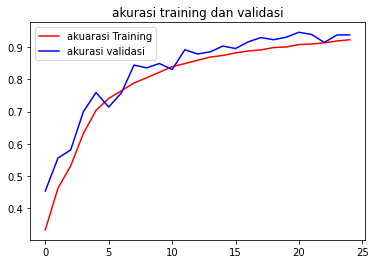

<Figure size 432x288 with 0 Axes>

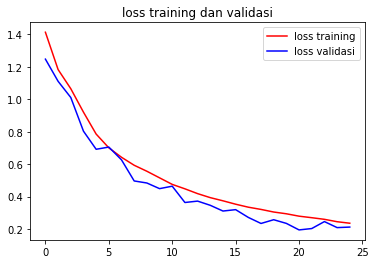

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label = 'akuarasi Training')
plt.plot(epochs, val_acc,'b',label='akurasi validasi')
plt.title('akurasi training dan validasi')
plt.legend(loc=0)
plt.figure()
plt.show()

plt.plot(epochs, loss, 'r', label = 'loss training')
plt.plot(epochs, val_loss,'b',label='loss validasi')
plt.title('loss training dan validasi')
plt.legend(loc=0)
plt.figure()
plt.show()

membuat model menjadi tflite

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with tf.io.gfile.GFile('model.tflite', 'wb') as f:
  f.write(tflite_model)

2022-09-21 05:37:12.361389: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.
2022-09-21 05:37:14.065316: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-21 05:37:14.066319: I tensorflow/core/grappler/devices.cc:66] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 1
2022-09-21 05:37:14.066481: I tensorflow/core/grappler/clusters/single_machine.cc:357] Starting new session
2022-09-21 05:37:14.067132: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-21 05:37:14.067982: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had ne